In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib as tpl

In [2]:
from scipy.stats import norm
from scipy.integrate import quad
np.random.seed(42)

# Exponential Bridge

In [3]:
# functions
def exponential_pdf(x, l):
    return(l*np.exp(-l*x))

def exponential_t_log_pdf(x, l):
    return(l*np.exp(-l*np.exp(x) + x))

def exponential_t_sqrt_pdf(x, l):
    return(2*x*l*np.exp(-l*x**2))

"""transforms: log"""

def exponential_t_log_mu(l):
    return(np.log(1/l))

def exponential_t_log_var(l):
    return(1)

def log_normal_back(x, mu, sigma):
    x_ = np.log(x)
    return(norm.pdf(x_, mu, sigma) * 1/x)

"""transforms: sqrt"""

def exponential_t_sqrt_mu(l):
    return(np.sqrt(1/(2*l)))

def exponential_t_sqrt_var(l):
    return(1/(4*l))

def sqrt_normal_back(x, mu, sigma):
    x_ = np.sqrt(x)
    return(norm.pdf(x_, mu, sigma) * 0.5 * 1/np.sqrt(x))


In [4]:
# log bridge

def plot_exponential_t_log(ls, save=False, filename='exponential_log_bridge', show_back=True):
    
    x = np.linspace(0,5,1000+1)
    x_t = np.linspace(-6,4,1000+1)

    l1, l2, l3 = ls 

    ##### original
    y1 = exponential_pdf(x, l1)
    y2 = exponential_pdf(x, l2)
    y3 = exponential_pdf(x, l3)

    ##### transformation

    y1_t_log = exponential_t_log_pdf(x_t, l1)
    y2_t_log = exponential_t_log_pdf(x_t, l2)
    y3_t_log = exponential_t_log_pdf(x_t, l3)

    mu1_t_log = exponential_t_log_mu(l1)
    mu2_t_log = exponential_t_log_mu(l2)
    mu3_t_log = exponential_t_log_mu(l3)

    sigma1_t_log = 1
    sigma2_t_log = 1
    sigma3_t_log = 1

    y1_N_t_log = norm.pdf(x_t, mu1_t_log, sigma1_t_log)
    y2_N_t_log = norm.pdf(x_t, mu2_t_log, sigma2_t_log)
    y3_N_t_log = norm.pdf(x_t, mu3_t_log, sigma3_t_log)

    ##### back transform
    if show_back:
        y1_back = log_normal_back(x, mu1_t_log, sigma1_t_log)
        y2_back = log_normal_back(x, mu2_t_log, sigma2_t_log)
        y3_back = log_normal_back(x, mu3_t_log, sigma3_t_log)

    """Plots"""
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = "Times New Roman"
    legend_size=25
    xlabel_size=25
    ylabel_size=25
    title_size=25
    lw = 3

    if show_back:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(26,6))
    else:
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(20,4))
        
    axs[0].plot(x, y1, 'r-', lw=lw)#, label="$\mathcal{E}$");
    axs[0].plot(x, y2, 'b-', lw=lw)#, label="exponential");
    axs[0].plot(x, y3, 'k-', lw=lw, label="$\mathcal{E}$")
    axs[0].set_yticklabels([])
    axs[0].set_yticks([])
    axs[0].set_xlabel('$g(x)$', fontsize=xlabel_size)
    axs[0].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
    axs[0].set_title('Laplace in standard basis', fontsize=title_size)
    axs[0].legend(prop={'size': legend_size});

    axs[1].plot(x_t, y1_t_log, 'r-', lw=lw)#, label="$\mathcal{E}$");
    axs[1].plot(x_t, y2_t_log, 'b-', lw=lw)#, label="exponential");
    axs[1].plot(x_t, y3_t_log, 'k-', lw=lw, label="$\mathcal{E}$");
    axs[1].plot(x_t, y1_N_t_log, 'r--', lw=lw)#, label="Laplace approximation");
    axs[1].plot(x_t, y2_N_t_log, 'b--', lw=lw)#, label="LPA of chi2_2");
    axs[1].plot(x_t, y3_N_t_log, 'k--', lw=lw, label="$\mathcal{N}$");
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_xlabel('$x$', fontsize=xlabel_size)
    axs[1].set_ylabel('$p(x)dx$', fontsize=ylabel_size)
    axs[1].set_title('Laplace in log basis', fontsize=title_size)
    axs[1].legend(prop={'size': legend_size});

    if show_back:
        axs[2].plot(x, y1, 'r-', lw=lw)#, label="exponential");
        axs[2].plot(x, y2, 'b-', lw=lw)#, label="exponential");
        axs[2].plot(x, y3, 'k-', lw=lw, label="$\mathcal{E}$");
        axs[2].plot(x, y1_back, 'r--', lw=lw)#, label="back transform")
        axs[2].plot(x, y2_back, 'b--', lw=lw)#, label="back transform")
        axs[2].plot(x, y3_back, 'k--', lw=lw, label="$\mathcal{N}$")
        axs[2].set_yticklabels([])
        axs[2].set_yticks([])
        axs[2].set_xlabel('$g(x)$', fontsize=xlabel_size)
        axs[2].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
        axs[2].set_title('Back to standard basis', fontsize=title_size)
        axs[2].legend(prop={'size': legend_size});
    
    plt.tight_layout()

    if save:
        plt.savefig(filename)

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


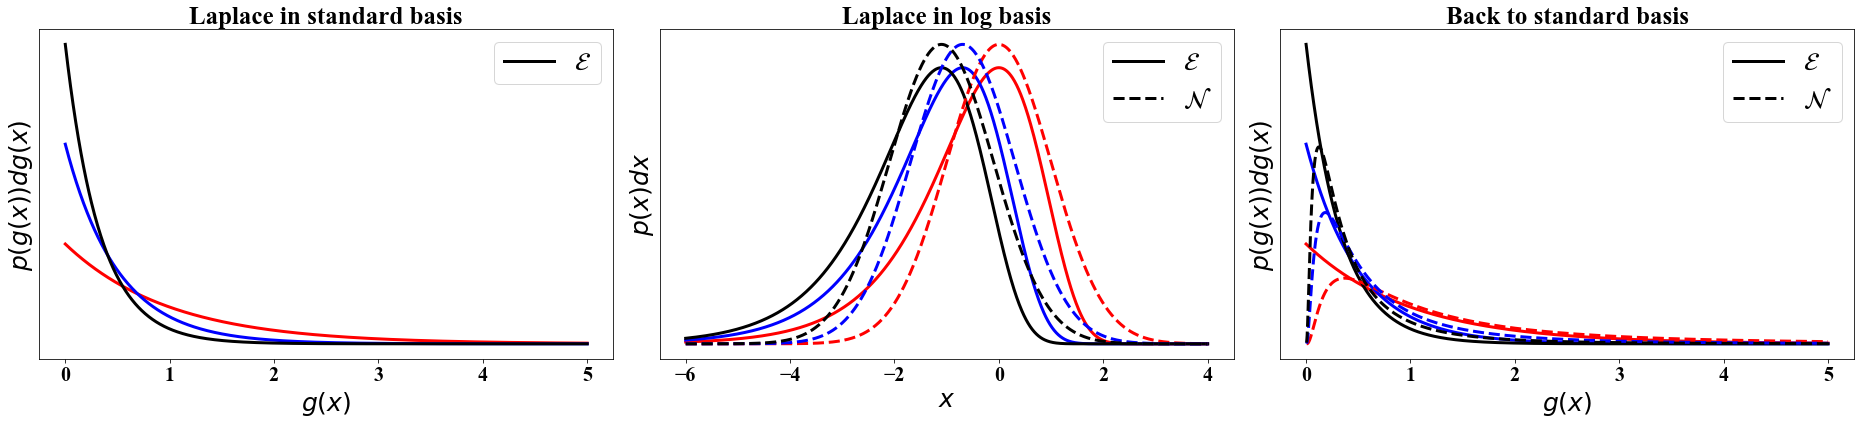

In [5]:
plot_exponential_t_log(ls=[1,2,3], save=True, filename='exponential_log_bridge.pdf', show_back=True)

In [8]:
########## Square basis transform ###########

def plot_exponential_t_sqrt(ls, save=False, filename='exponential_sqrt_bridge', show_back=True):

    x = np.linspace(0,5,1000+1)
    x_t = np.linspace(0,3,1000+1)

    l1, l2, l3 = ls

    ##### original
    y1 = exponential_pdf(x, l1)
    y2 = exponential_pdf(x, l2)
    y3 = exponential_pdf(x, l3)

    ##### sqrt transformation
    y1_t_sqrt = exponential_t_sqrt_pdf(x_t, l1) 
    y2_t_sqrt = exponential_t_sqrt_pdf(x_t, l2) 
    y3_t_sqrt = exponential_t_sqrt_pdf(x_t, l3)

    mu1_t_sqrt = exponential_t_sqrt_mu(l1)
    mu2_t_sqrt = exponential_t_sqrt_mu(l2)
    mu3_t_sqrt = exponential_t_sqrt_mu(l3)

    sigma1_t_sqrt = np.sqrt(exponential_t_sqrt_var(l1))
    sigma2_t_sqrt = np.sqrt(exponential_t_sqrt_var(l2))
    sigma3_t_sqrt = np.sqrt(exponential_t_sqrt_var(l3))

    y1_N_t_sqrt = norm.pdf(x_t, mu1_t_sqrt, sigma1_t_sqrt) 
    y2_N_t_sqrt = norm.pdf(x_t, mu2_t_sqrt, sigma2_t_sqrt) 
    y3_N_t_sqrt = norm.pdf(x_t, mu3_t_sqrt, sigma3_t_sqrt) 

    ##### back transform
    y1_back = sqrt_normal_back(x, mu1_t_sqrt, sigma1_t_sqrt)
    y2_back = sqrt_normal_back(x, mu2_t_sqrt, sigma2_t_sqrt)
    y3_back = sqrt_normal_back(x, mu3_t_sqrt, sigma3_t_sqrt)

    ##### plots
    """Plots"""
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = "Times New Roman"
    legend_size=25
    xlabel_size=25
    ylabel_size=25
    title_size=25
    lw = 3

    if show_back:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(26,6))
    else:
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(20,4))
        
    axs[0].plot(x, y1, 'r-', lw=lw)#, label="$\mathcal{E}$");
    axs[0].plot(x, y2, 'b-', lw=lw)#, label="exponential");
    axs[0].plot(x, y3, 'k-', lw=lw, label="$\mathcal{E}$")
    axs[0].set_yticklabels([])
    axs[0].set_yticks([])
    axs[0].set_xlabel('$g(x)$', fontsize=xlabel_size)
    axs[0].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
    axs[0].set_title('Laplace in standard basis', fontsize=title_size)
    axs[0].legend(prop={'size': legend_size});

    axs[1].plot(x_t, y1_t_sqrt, 'r-', lw=lw)#, label="$\mathcal{E}$");
    axs[1].plot(x_t, y2_t_sqrt, 'b-', lw=lw)#, label="exponential");
    axs[1].plot(x_t, y3_t_sqrt, 'k-', lw=lw, label="$\mathcal{E}$");
    axs[1].plot(x_t, y1_N_t_sqrt, 'r--', lw=lw)#, label="Laplace approximation");
    axs[1].plot(x_t, y2_N_t_sqrt, 'b--', lw=lw)#, label="LPA of chi2_2");
    axs[1].plot(x_t, y3_N_t_sqrt, 'k--', lw=lw, label="$\mathcal{N}$");
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_xlabel('$x$', fontsize=xlabel_size)
    axs[1].set_ylabel('$p(x)dx$', fontsize=ylabel_size)
    axs[1].set_title('Laplace in sqrt basis', fontsize=title_size)
    axs[1].legend(prop={'size': legend_size});

    if show_back:
        axs[2].plot(x, y1, 'r-', lw=lw)#, label="exponential");
        axs[2].plot(x, y2, 'b-', lw=lw)#, label="exponential");
        axs[2].plot(x, y3, 'k-', lw=lw, label="$\mathcal{E}$");
        axs[2].plot(x, y1_back, 'r--', lw=lw)#, label="back transform")
        axs[2].plot(x, y2_back, 'b--', lw=lw)#, label="back transform")
        axs[2].plot(x, y3_back, 'k--', lw=lw, label="$\mathcal{N}$")
        axs[2].set_yticklabels([])
        axs[2].set_yticks([])
        axs[2].set_xlabel('$g(x)$', fontsize=xlabel_size)
        axs[2].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
        axs[2].set_title('Back to standard basis', fontsize=title_size)
        axs[2].legend(prop={'size': legend_size});
    
    plt.tight_layout()

    if save:
        plt.savefig(filename)

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide


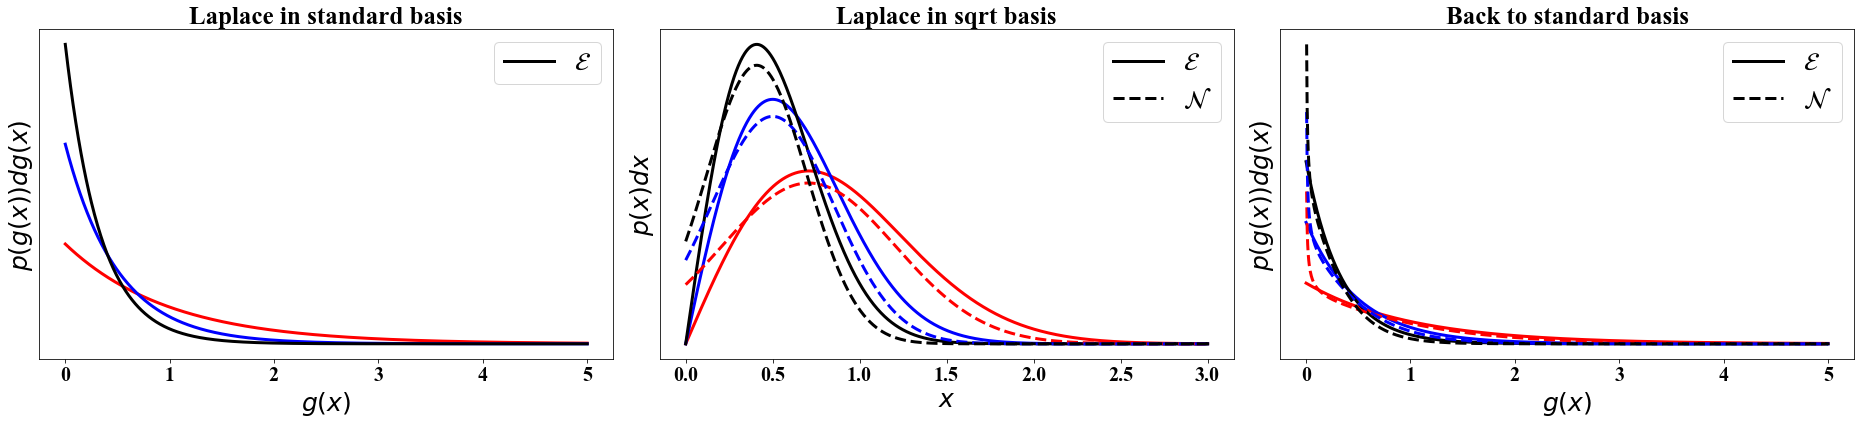

In [9]:
plot_exponential_t_sqrt(ls=[1,2,3], save=True, filename='exponential_sqrt_bridge.pdf', show_back=True)

# Verify the Bridges

In [17]:
# verify the log bridge

def exponential_t_log_lambda(mu):
    return(1/np.exp(mu))
    
test_l1 = 3
test_m1, test_s1 = exponential_t_log_mu(test_l1), np.sqrt(exponential_t_log_var(test_l1))
test_l2 = exponential_t_log_lambda(test_m1)

print(test_l2)

rand_l1 = np.random.random()
rand_m1, rand_s1 = exponential_t_log_mu(rand_l1), np.sqrt(exponential_t_log_var(rand_l1))
rand_l2 = exponential_t_log_lambda(rand_m1)

assert(np.allclose(rand_l1, rand_l2))

3.0


In [18]:
# verify the sqrt bridge

def exponential_t_sqrt_lambda(mu):
    return(1/(2*mu**2))

test_l3 = 3
test_m3, test_s3 = exponential_t_sqrt_mu(test_l3), np.sqrt(exponential_t_sqrt_var(test_l3))
test_l4 = exponential_t_log_lambda(test_m3)

print(test_l2)

rand_l3 = np.random.random()
rand_m3, rand_s3 = exponential_t_sqrt_mu(rand_l3), np.sqrt(exponential_t_sqrt_var(rand_l3))
rand_l4 = exponential_t_sqrt_lambda(rand_m3)

assert(np.allclose(rand_l3, rand_l4))

3.0


# Statistical Distance Measures

In [22]:
# look at MMD
from torch_two_sample import MMDStatistic
from scipy.stats import norm, gamma, expon
import torch

## MMD from 100 different parameters

In [23]:
def MMD_combinations(Ls, plot=False, n_samples=1000, verbose=True):

    MMD_sum = 0
    MMD_t_sqrt_sum = 0
    MMD_t_log_sum = 0 

    for l in Ls:

        if verbose:
            print("l: ", l)

        #get samples from all dists
        #standard
        E_samples = expon.rvs(scale=1/l, size=n_samples)
        #there is no laplace approximation for the standard basis


        #log
        mode1_log = exponential_t_log_mu(l)
        sigma1_log = np.sqrt(exponential_t_log_var(l))
        E_samples_log = np.log(E_samples)
        N_samples_log = norm.rvs(mode1_log, sigma1_log, size=n_samples)

        #sqrt
        mode1_sqrt = exponential_t_sqrt_mu(l)
        sigma1_sqrt = np.sqrt(exponential_t_sqrt_var(l))
        E_samples_sqrt = np.sqrt(E_samples)
        N_samples_sqrt = norm.rvs(mode1_sqrt, sigma1_sqrt, size=n_samples)


        #calculate MMD for all bases
        MMD = MMDStatistic(n_samples, n_samples)

        #standard
        #not given for exponential

        #log
        E_samples_log_ = torch.Tensor(E_samples_log.reshape((n_samples, -1)))
        N_samples_log_ = torch.Tensor(N_samples_log.reshape((n_samples, -1)))
        MMD_log_= MMD(E_samples_log_, N_samples_log_,  alphas=[0.5], ret_matrix=False)

        #sqrt
        E_samples_sqrt_ = torch.Tensor(E_samples_sqrt.reshape((n_samples, -1)))
        N_samples_sqrt_ = torch.Tensor(N_samples_sqrt.reshape((n_samples, -1)))
        MMD_sqrt_ = MMD(E_samples_sqrt_, N_samples_sqrt_,  alphas=[0.5], ret_matrix=False)

        if plot:
            n_bins = int(np.sqrt(n_samples))
            fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(16, 6))
            #axs[0].hist(E_samples, bins = n_bins, alpha=0.5, label='$\mathcal{G}$')
            #axs[0].hist(N_samples, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
            #axs[0].set_title('standard basis')
            #axs[0].legend()

            axs[0].hist(E_samples_log, bins = n_bins, alpha=0.5, label='$\mathcal{E}$')
            axs[0].hist(N_samples_log, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
            axs[0].set_title('log basis')
            axs[0].legend()

            axs[1].hist(E_samples_sqrt, bins = n_bins, alpha=0.5, label='$\mathcal{E}$')
            axs[1].hist(N_samples_sqrt, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
            axs[1].set_title('sqrt basis')
            axs[1].legend()

            plt.show()

        #add them to their respective sums
        MMD_t_log_sum += MMD_log_
        MMD_t_sqrt_sum += MMD_sqrt_
            
    return(MMD_t_log_sum.item(), MMD_t_sqrt_sum.item())

In [24]:
MMD_combinations(Ls = range(1,101), plot=False, verbose=True, n_samples=2000)

l:  1
l:  2
l:  3
l:  4
l:  5
l:  6
l:  7
l:  8
l:  9
l:  10
l:  11
l:  12
l:  13
l:  14
l:  15
l:  16
l:  17
l:  18
l:  19
l:  20
l:  21
l:  22
l:  23
l:  24
l:  25
l:  26
l:  27
l:  28
l:  29
l:  30
l:  31
l:  32
l:  33
l:  34
l:  35
l:  36
l:  37
l:  38
l:  39
l:  40
l:  41
l:  42
l:  43
l:  44
l:  45
l:  46
l:  47
l:  48
l:  49
l:  50
l:  51
l:  52
l:  53
l:  54
l:  55
l:  56
l:  57
l:  58
l:  59
l:  60
l:  61
l:  62
l:  63
l:  64
l:  65
l:  66
l:  67
l:  68
l:  69
l:  70
l:  71
l:  72
l:  73
l:  74
l:  75
l:  76
l:  77
l:  78
l:  79
l:  80
l:  81
l:  82
l:  83
l:  84
l:  85
l:  86
l:  87
l:  88
l:  89
l:  90
l:  91
l:  92
l:  93
l:  94
l:  95
l:  96
l:  97
l:  98
l:  99
l:  100


(2.55279541015625, 0.132343590259552)

In [25]:
results = np.array([2.50665020942688, 0.136518657207489])
results_normed = results/results.max() 
print(results_normed)

[1.         0.05446259]


## KL-divergence (mode seeking/backward, from PDF)

In [26]:
def normal_pdf(x, mu, sigma):
    return(1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)**2/sigma**2)))

In [27]:
# check out Samples vs Dir
# True distributions belong to samples_1
# Laplace approximations belong to samples_2

def KL_divergence_pdf(x_linspace, pdf_1, pdf_2, plot=False):
    
    pdf_1[pdf_1 < 1e-6] = 1e-6
    pdf_2[pdf_2 < 1e-6] = 1e-6
    
    #calculate KL_div
    KL_div = (pdf_1 * np.log(pdf_1 / pdf_2))

    if plot:
        plt.plot(x_linspace, pdf_1, label='pdf_1')
        plt.plot(x_linspace, pdf_2, label='pdf_2')
        plt.plot(x_linspace, KL_div, lw=1, label='KL_div')
        plt.legend()
        plt.show()
            
    KL_div = np.sum(KL_div)
        
    return(KL_div)

In [28]:
def adjust_dist(l, base='standard'):
    
    #base can be any of "standard", "sqrtm" or "log"
    
    if base == "log":
        x_large = np.linspace(-1000, 1000, 2000)
    else:
        x_large = np.linspace(0.0001, 1000, 1000)
        
    
    if base == "sqrt":
        
        mode_sqrt = exponential_t_sqrt_mu(l)
        sigma_sqrt = np.sqrt(exponential_t_sqrt_var(l))
        
        #get the range of x
        E_pdf_large = exponential_t_sqrt_pdf(x_large,l)
        N_pdf_large = normal_pdf(x_large, mode_sqrt, sigma_sqrt)
        upper = np.max([np.sum(E_pdf_large > 1e-6), np.sum(N_pdf_large > 1e-6)])
        x_plus = np.linspace(0.0001, upper, 1000)
        
        #now do the actual pdfs
        E_pdf = exponential_t_sqrt_pdf(x_plus, l)
        N_pdf = normal_pdf(x_plus, mode_sqrt, sigma_sqrt)
        
        return(x_plus, E_pdf, N_pdf)
    
    if base == "log":
        
        mode_log = exponential_t_log_mu(l)
        sigma_log = np.sqrt(exponential_t_log_var(l))
        
        #get the range of x
        E_pdf_large = exponential_t_log_pdf(x_large, l)
        N_pdf_large = normal_pdf(x_large, mode_log, sigma_log)
        range_ = np.max([np.sum(E_pdf_large > 1e-6), np.sum(N_pdf_large > 1e-6)])
        lower = mode_log - range_/2
        upper = mode_log + range_/2
        x = np.linspace(lower, upper, 1000)
        
        #now do the actual pdfs
        E_pdf = exponential_t_log_pdf(x, l)
        N_pdf = normal_pdf(x, mode_log, sigma_log)
        
        return(x, E_pdf, N_pdf)
        
        
        

In [43]:
def KL_div_pdf_combinations(Ls, plot=False, verbose=True):

    KL_div_sum = 0
    KL_div_t_sqrt_sum = 0
    KL_div_t_log_sum = 0 

    for l in Ls:

        if verbose:
            print("l: ", l)

        #get the ranges and pdfs
        x_sqrt, E_pdf_sqrt, N_pdf_sqrt = adjust_dist(l, 'sqrt')
        x_log, E_pdf_log, N_pdf_log = adjust_dist(l, 'log')

        #calculate the KL divergences for all bases
        KL_div_log_ = KL_divergence_pdf(x_log, E_pdf_log, N_pdf_log, plot=plot)
        KL_div_sqrt_ = KL_divergence_pdf(x_sqrt, E_pdf_sqrt, N_pdf_sqrt, plot=plot) 

        #add them to their respective sums
        KL_div_t_log_sum += KL_div_log_
        KL_div_t_sqrt_sum += KL_div_sqrt_
            
            
    return(KL_div_t_log_sum, KL_div_t_sqrt_sum)

In [30]:
print(KL_div_pdf_combinations(Ls = range(1,101), plot=False, verbose=True))

l:  1
l:  2
l:  3
l:  4
l:  5
l:  6
l:  7
l:  8
l:  9
l:  10
l:  11
l:  12
l:  13
l:  14
l:  15
l:  16
l:  17
l:  18
l:  19
l:  20
l:  21
l:  22
l:  23
l:  24
l:  25
l:  26
l:  27
l:  28
l:  29
l:  30
l:  31
l:  32
l:  33
l:  34
l:  35
l:  36
l:  37
l:  38
l:  39
l:  40
l:  41
l:  42
l:  43
l:  44
l:  45
l:  46
l:  47
l:  48
l:  49
l:  50
l:  51
l:  52
l:  53
l:  54
l:  55
l:  56
l:  57
l:  58
l:  59
l:  60
l:  61
l:  62
l:  63
l:  64
l:  65
l:  66
l:  67
l:  68
l:  69
l:  70
l:  71
l:  72
l:  73
l:  74
l:  75
l:  76
l:  77
l:  78
l:  79
l:  80
l:  81
l:  82
l:  83
l:  84
l:  85
l:  86
l:  87
l:  88
l:  89
l:  90
l:  91
l:  92
l:  93
l:  94
l:  95
l:  96
l:  97
l:  98
l:  99
l:  100
(1762.713377051608, 11216.067279739742)


/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  


In [31]:
results_KL = np.array([1762.713377051608, 11216.067279739742])
results_KL_normed = results_KL/results_KL.max()
results_KL_normed

array([0.15715967, 1.        ])

# Statistical distance measures for small, medium and large $\theta$

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


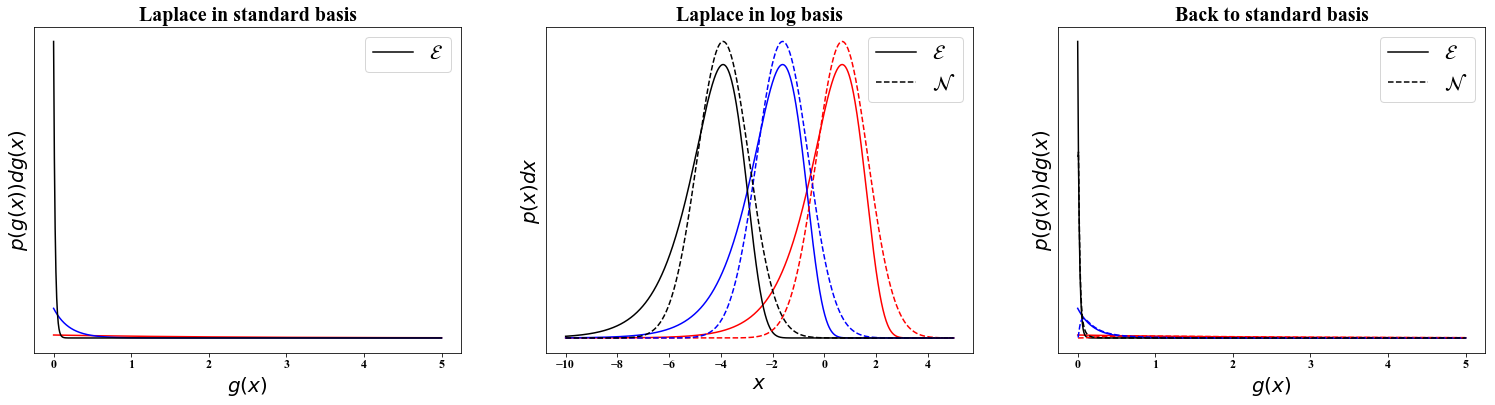

In [32]:
l_s = 0.5
l_m = 5
l_l = 50
plot_exponential_t_log(ls=[l_s, l_m, l_l])

## calculate MMD for the three lambdas

In [41]:
# use 10 seeds
MMD_results_s = []
MMD_results_m = []
MMD_results_l = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    torch.manual_seed(s)
    MMD_s = MMD_combinations(Ls = [l_s], n_samples=2000)
    MMD_m = MMD_combinations(Ls = [l_m], n_samples=2000)
    MMD_l = MMD_combinations(Ls = [l_l], n_samples=2000)
    MMD_results_s += [MMD_s]
    MMD_results_m += [MMD_m]
    MMD_results_l += [MMD_l]
    
MMD_results_mean_s = np.array(MMD_results_s).mean(0)
MMD_results_mean_m = np.array(MMD_results_m).mean(0)
MMD_results_mean_l = np.array(MMD_results_l).mean(0)
print(MMD_results_mean_s)
print(MMD_results_mean_m)
print(MMD_results_mean_l)

seed:  0
l:  0.5
l:  5
l:  50
seed:  1
l:  0.5
l:  5
l:  50
seed:  2
l:  0.5
l:  5
l:  50
seed:  3
l:  0.5
l:  5
l:  50
seed:  4
l:  0.5
l:  5
l:  50
seed:  5
l:  0.5
l:  5
l:  50
seed:  6
l:  0.5
l:  5
l:  50
seed:  7
l:  0.5
l:  5
l:  50
seed:  8
l:  0.5
l:  5
l:  50
seed:  9
l:  0.5
l:  5
l:  50
[0.02393449 0.01889346]
[0.02636421 0.00527363]
[0.02691948 0.00060513]


In [42]:
# normalize to 1 for comparison
print(MMD_results_mean_s/MMD_results_mean_s.max())
print(MMD_results_mean_m/MMD_results_mean_m.max())
print(MMD_results_mean_l/MMD_results_mean_l.max())

[1.        0.7893823]
[1.        0.2000298]
[1.         0.02247926]


## calculate KL div for the three lambdas

In [44]:
KL_results_s = []
KL_results_m = []
KL_results_l = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    KL_s = KL_div_pdf_combinations(Ls = [l_s])
    KL_m = KL_div_pdf_combinations(Ls = [l_m])
    KL_l = KL_div_pdf_combinations(Ls = [l_l])
    KL_results_s += [KL_s]
    KL_results_m += [KL_m]
    KL_results_l += [KL_l]
    
KL_results_mean_s = np.array(KL_results_s).mean(0)
KL_results_mean_m = np.array(KL_results_m).mean(0)
KL_results_mean_l = np.array(KL_results_l).mean(0)
print(KL_results_mean_s)
print(KL_results_mean_m)
print(KL_results_mean_l)

seed:  0
l:  0.5
l:  5
l:  50
seed:  1
l:  0.5
l:  5
l:  50
seed:  2
l:  0.5
l:  5
l:  50
seed:  3
l:  0.5
l:  5
l:  50
seed:  4
l:  0.5
l:  5
l:  50
seed:  5
l:  0.5
l:  5
l:  50
seed:  6
l:  0.5
l:  5
l:  50
seed:  7
l:  0.5
l:  5
l:  50
seed:  8
l:  0.5
l:  5
l:  50
seed:  9
l:  0.5
l:  5
l:  50
[17.16492443 20.59344546]
[18.1920563  61.78920411]
[ 17.16492443 123.5922735 ]


/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  


In [45]:
# normalize to 1 for comparison
print(KL_results_mean_s/KL_results_mean_s.max())
print(KL_results_mean_m/KL_results_mean_m.max())
print(KL_results_mean_l/KL_results_mean_l.max())

[0.83351397 1.        ]
[0.29442128 1.        ]
[0.13888348 1.        ]
